# Описание проекта

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

## Инструкция по выполнению проекта

- Проведите исследовательский анализ данных средствами SQL.
- Соберите данные для анализа из базы.
- Проанализируйте данные средствами Python.

## Изучение данных

In [1]:
import pandas as pd
import numpy as np
from math import factorial
from scipy import stats as st

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df1 = pd.read_csv('/datasets/query_1.csv')
df2 = pd.read_csv('/datasets/query_3.csv')
df3 = pd.read_csv('/datasets/query_last.csv')

In [3]:
df1.info()
display(df1.describe())
display(df1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


У нас 8 записей без пропусков с правильным типом данных.

In [4]:
df2.info()
display(df2.describe())
display(df2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


101 запись без пропусков с правильным типом данных.

In [5]:
df3.info()
display(df3.describe())
display(df3.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   week_number    10 non-null     int64  
 1   ticket_amount  10 non-null     int64  
 2   festival_week  3 non-null      float64
 3   festival_name  3 non-null      object 
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


,week_number,ticket_amount,festival_week
count,10.00000,10.000000,3.000000
mean,34.50000,50670.400000,32.333333
std,3.02765,2502.752716,3.214550
min,30.00000,43568.000000,30.000000
25%,32.25000,51364.500000,30.500000
50%,34.50000,51439.000000,31.000000
75%,36.75000,51596.750000,33.500000
max,39.00000,51675.000000,36.000000


,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN


10 записей с пропусками в тех неделях в которых не проходили фестивали, типы данных правильные, так nan это тип float, поэтому колонка festival_week имеет тип float64.

## Анализ данных

Выберем топ-10 городов по среднему количеству рейсов

In [6]:
df2.sort_values(by='average_flights', ascending=False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


### Построим графики

Построим горизонтальную столбчатую диаграмму моделей самолетов и количества рейсов

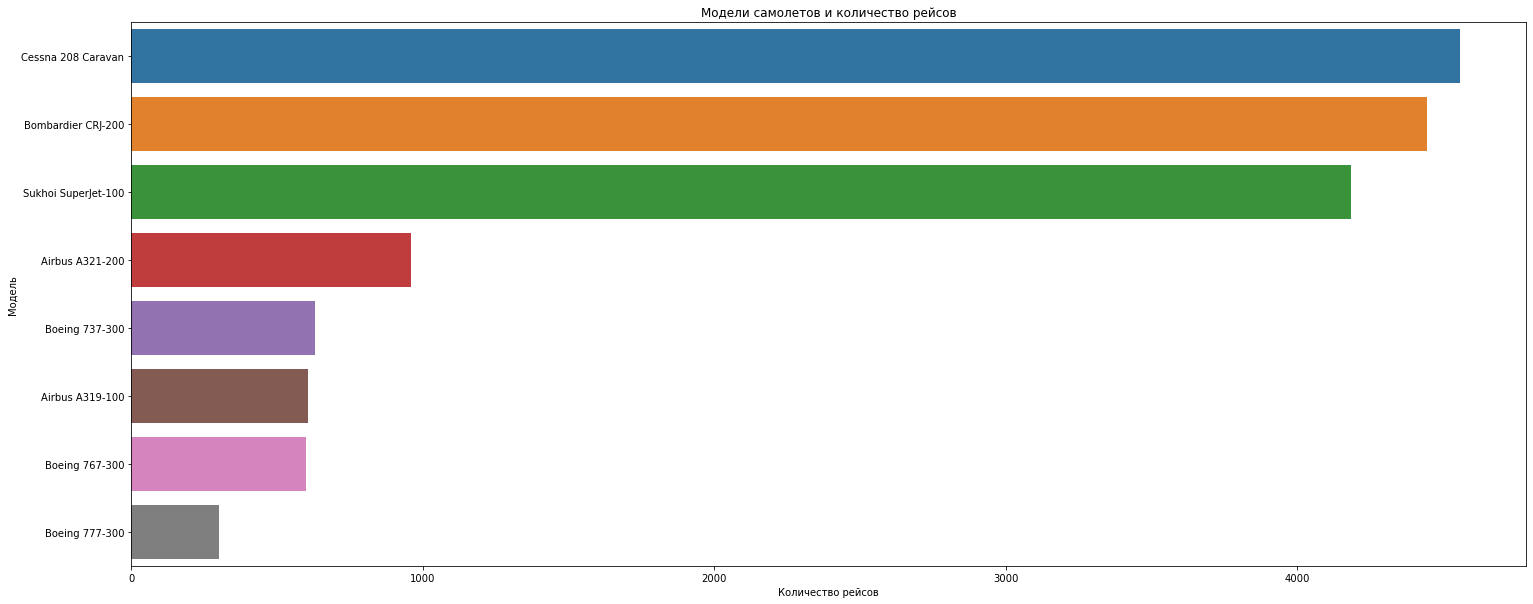

In [7]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(y='model',x='flights_amount', data=df1, ax=ax, order = df1.sort_values(by='flights_amount', ascending=False)['model']) \
    .set_title('Модели самолетов и количество рейсов')
ax.set(xlabel='Количество рейсов', ylabel='Модель');

Самым часто летающим оказался Cessna 208 Caravan, а самым малолетающим Boeing 777-300. Первая двойка это скорее частные самолеты с малым количеством колчеством пассажиров, за счёт этого таким самолетом проще летать чаще и это будет дешевле например в те города, куда ты не можешь отправить Boeing по экономическим соображениям, потому что больше 20 человек туда за раз не летают. Sukhoi Superjet-100 это самолет средней вместительности среди всех представленных, и выбывается на фоне остальных вероятнее всего тем, что это самолет российского производства и его покупали российские авиакомпани. Остальные самолёты вероятнее всего используются иностранными компаниями, которые возят людей в Россию.

Построим горизонтальную столбчатую диаграмму городов и количества рейсов

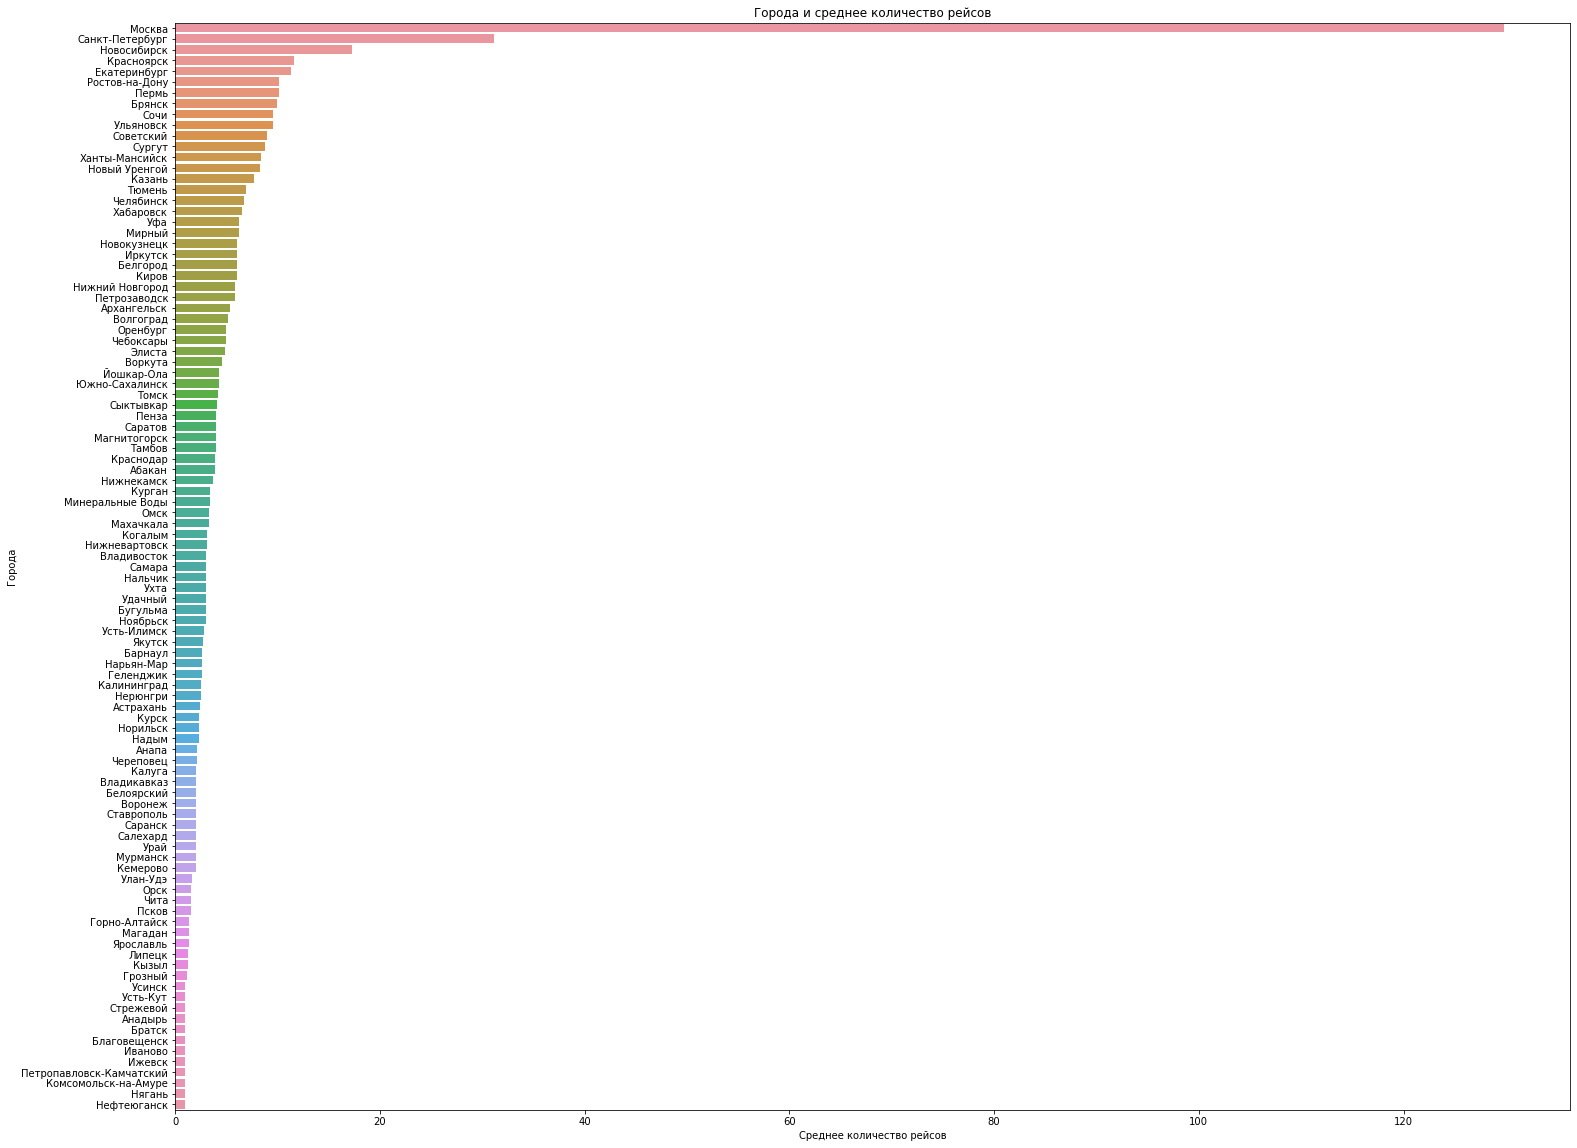

In [8]:
fig, ax = plt.subplots(figsize=(25,20))
sns.barplot(y='city',x='average_flights', data=df2, ax=ax, order = df2.sort_values(by='average_flights', ascending=False)['city']) \
    .set_title('Города и среднее количество рейсов')
ax.set(xlabel='Среднее количество рейсов', ylabel='Города');

На первом месте оказалась Москва, что не удивительно, ведь это столица России, а так же основной пересадочный пункт, если ты, например, летишь в глубинку России. Так же всё зависит от плотности населения города, и его "ценности", с экономической и культурной точки зрения.

Построим горизонтальную столбчатую диаграмму топ-10 городов и количества рейсов

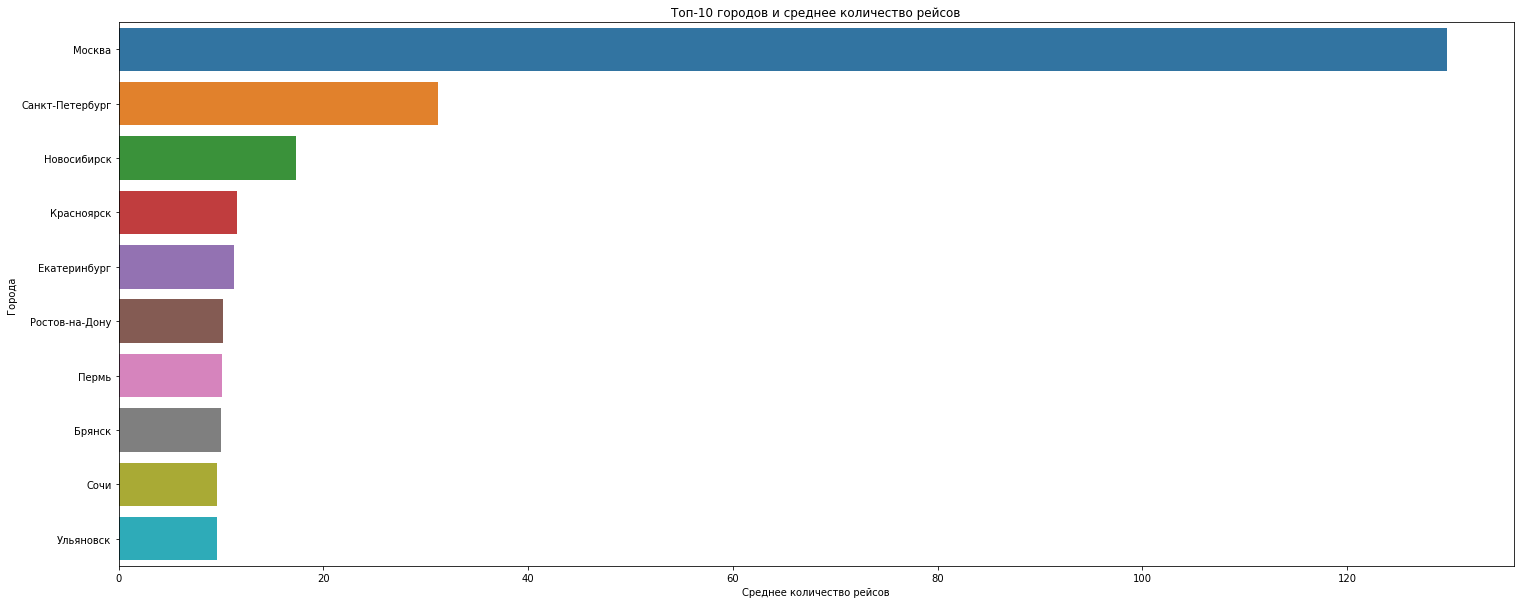

In [9]:
top_10_city = df2.sort_values(by='average_flights', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(y='city',x='average_flights', data=top_10_city, ax=ax, order = top_10_city.sort_values(by='average_flights', ascending=False)['city']) \
    .set_title('Топ-10 городов и среднее количество рейсов')
ax.set(xlabel='Среднее количество рейсов', ylabel='Города');

Как мы выяснили ранее, Москва на первом месте, т.к. она столица России, а так же основной пересадочный пункт. На втором по количесву рейсов идёт Санкт-Петербург "северная культураня столица", очень популярное место для туристов не только заграничных, но и туристов внутри нашей страны. Популярный развитый город, в который приятно каждый раз возвращаться. Далее на графике мы можем увидеть резкое падение количества рейсов, возможно это связано с уменьшением количества населения в городах, но тут также есть Сочи, который явлется достаточно популярным местом даже в сентябре, возможно туда летают рейсы просто с большим количеством пассажиров на борту.

## Проверка гипотез

Так как выборка совсем не большая, возьмем пороговое значение alpha 0.01, что бы уменьшить вероятность отвергания нулевой гипотезы.

In [10]:
alpha = .01

H0 - Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время

H1 - Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время

In [11]:
df3['is_festival_week'] = df3.apply(lambda row: not pd.isnull(row['festival_week']), axis=1)

In [12]:
df3

,week_number,ticket_amount,festival_week,festival_name,is_festival_week
0,30,43568,30.0,Park Live,True
1,31,51034,31.0,Пикник Афиши,True
2,32,51675,NaN,NaN,False
3,33,51378,NaN,NaN,False
4,34,51492,NaN,NaN,False
5,35,51360,NaN,NaN,False
6,36,51386,36.0,Видфест,True
7,37,51670,NaN,NaN,False
8,38,51518,NaN,NaN,False
9,39,51623,NaN,NaN,False


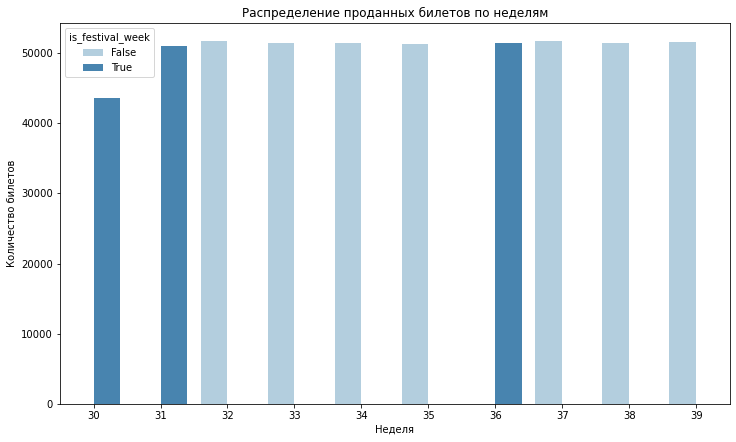

In [13]:
fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(x = 'week_number',
            y = 'ticket_amount',
            hue = 'is_festival_week',
            data = df3,
            palette = "Blues",ax=ax) \
    .set_title('Распределение проданных билетов по неделям')
ax.set(xlabel='Неделя', ylabel='Количество билетов');

Мы получили временной ряд с количеством продаж билетов за каждую неделю.

Для проверки гипотезы воспользуемся критерием Манна-Уитни, он подходит для двух независимых выборок с малым количеством наблюдений.

In [14]:
mean_ticket_amount_by_week = st.mannwhitneyu(
    df3[df3['is_festival_week'] == False]['ticket_amount'],
    df3[df3['is_festival_week'] == True]['ticket_amount'])

print('p-значение:', mean_ticket_amount_by_week.pvalue)

if (mean_ticket_amount_by_week.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.03412374418900064
Не получилось отвергнуть нулевую гипотезу


**Вывод:** p-value показывает нам, что нет оснований отвергать нулевую гипотезу. 

Выполняя проект мы смогли выяснить:
- каких самолетов летает больше всего по нашей стране
- сколько в среднем рейсов летает в разные города России
- вывести топ-10 городов по среднему количеству рейсов

А так же мы смогли выяснить, что средний спрос на количество билетов в фестивальные недели не отличается от обычного спроса на билеты.